In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

from DBN import DBN
from utils import show_img
import scipy.io as sio

Using TensorFlow backend.


# Load & pre-process data

## Loads mnist

In [2]:
# num_class = 10
# input_shape = (28, 28, 1)

# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train = x_train.reshape(-1, np.prod(input_shape)).astype('float32') / 255
# x_test = x_test.reshape(-1, np.prod(input_shape)).astype('float32') / 255

## Loads binaryAlphadigits

In [3]:
num_class = 36
input_shape = (20, 16)

classlabels = sio.loadmat('data/binaryalphadigs.mat')['classlabels'][0]
dat = sio.loadmat('data/binaryalphadigs.mat')['dat']
num_example = 39

x = np.zeros((num_class, num_example, *input_shape))
y = np.zeros((num_class, num_example))

for idx_class in range(num_class):
    x[idx_class] = np.array([*dat[idx_class,:]])
    y[idx_class] = idx_class
    
x_train = x.reshape((-1, np.prod(input_shape)))
y_train = y.reshape((-1))

In [4]:
print(f"x_train: {x_train.shape} \ny_train: {y_train.shape}")

x_train: (1404, 320) 
y_train: (1404,)


In [5]:
batch = []
for i in range(num_class):
    batch.append( x_train[np.where(y_train == i)[0],] )

# Training

In [6]:
dbn = DBN(n_h=[np.prod(input_shape), 32, 16, 10])

100%|██████████| 20/20 [00:00<00:00, 1013.13it/s]


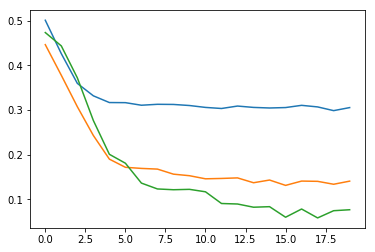

In [7]:
dbn.train(batch[6], epochs=20, lr=3e-3)

# Create image

In [8]:
noise = np.random.normal(size=(1, np.prod(input_shape)))
output = noise
n_iter = 3

for _ in range(n_iter):
    output = dbn.backward(dbn.forward(output))

# Post-process data

In [9]:
img = np.squeeze(output.reshape(input_shape))

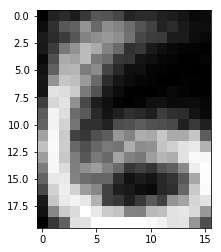

In [10]:
show_img(img)